1: Importing Packages

In [58]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohaR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohaR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

2: Load The Data

In [59]:
df = pd.read_csv('./spam.csv', encoding='latin1')

3: Data Cleaning

In [60]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'email'})
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
df.isnull().sum()

label    0
email    0
dtype: int64

In [63]:
# Check for duplicates

df.duplicated().sum()

df = df.drop_duplicates(keep='first')   

In [64]:
df.shape

(5169, 2)

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

4: EDA

4.1:Percentage of ham and spam

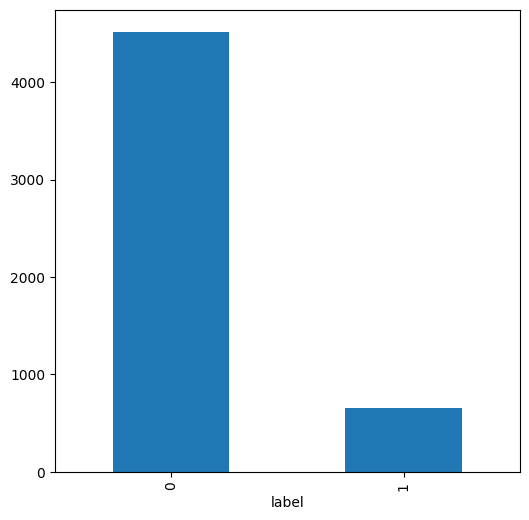

In [66]:
df['label'].value_counts().plot(kind='bar', figsize=(6, 6))
plt.show()

4.2: Text Length and Structure Analysis

In [67]:
df['num_characters'] = df['email'].apply(len)
df['num_words'] = df['email'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['email'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [68]:
df[['num_characters', 'num_words', 'num_sentence']].describe()


,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


4.3: Summary Statistics for Legitimate Messages

In [69]:
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()


,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


4.4: Summary Statistics for Spam Messages

In [70]:
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()


,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000
